In [1]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statannot
import pandas as pd

In [2]:
def load_var_from_mat(mat_file_name, varname):
    try:
        data = loadmat(mat_file_name)
        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')
        var = data[varname][()]
    return var

In [3]:
pth_mat_liver = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\volcell_super_good_version\liver_old_vol\liver_table.mat'
data_raw_liver = load_var_from_mat(pth_mat_liver, 'liver_table')

In [4]:
colnames = ['reg_centroid_x',
'reg_centroid_y',
'Centroid_x',
'Centroid_y',
'Area',
'Perimeter',
'Circularity',
'Aspect Ratio',
'compactness',
'eccentricity',
'extent',
'form_factor',
'maximum_radius',
'mean_radius',
'median_radius',
'minor_axis_length',
'major_axis_length',
'orientation_degrees',
'r_mean_intensity_norm',
'g_mean_intensity_norm',
'b_mean_intensity_norm',
'slide_num',
'class']

In [5]:
df_liver = pd.DataFrame(np.transpose(data_raw_liver), columns=colnames[:-1])
df_liver['class'] = [2 for _ in range(len(df_liver))]

In [6]:
df_liver.head()

,reg_centroid_x,reg_centroid_y,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,...,mean_radius,median_radius,minor_axis_length,major_axis_length,orientation_degrees,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm,slide_num,class
0,2737.670654,1315.016968,23022.0,9934.0,126.324829,40.572639,0.964344,1.143750,13.031002,0.485356,...,6.333393,6.208154,11.926326,13.640738,4953.127930,-1.130252,-2.442952,-2.470535,181.0,2
1,2800.663818,1248.846924,23424.0,9566.0,70.461174,32.037445,0.862669,1.092756,14.566857,0.403187,...,4.743773,4.742319,9.148310,9.996868,3235.429932,-1.253668,-1.792261,-1.569824,181.0,2
2,2775.001465,1209.805542,23258.0,9382.0,137.169479,41.980198,0.978089,1.045216,12.847879,0.290944,...,6.606557,6.604823,12.983445,13.570502,1647.901001,0.353788,-0.690295,-0.580998,181.0,2
3,2763.458496,1329.821045,23174.0,10010.0,64.644943,31.310467,0.828639,1.131726,15.165073,0.468231,...,4.542308,4.500757,8.675959,9.818809,3058.329102,0.976964,-1.340248,-0.860567,181.0,2
4,2789.617676,1262.128540,23358.0,9642.0,94.547668,35.956200,0.918995,1.138517,13.674036,0.478045,...,5.492355,5.481108,10.396406,11.836490,2094.899414,-1.207197,-2.859513,-2.489028,181.0,2


In [7]:
liver_sample_df = df_liver.sample(n=100000).reset_index(drop=True)

In [8]:
good_names = ['Area (um)', 'Perimeter (um)', 'Circularity', 'Aspect Ratio', 'Compactness',
       'Eccentricity', 'Extent', 'Form Factor', 'Maximum Radius (um)',
       'Mean Radius (um)', 'Minor Axis Length (um)', 'Major Axis Length (um)',
       'Normalized Mean R Intensity', 'Normalized Mean G Intensity',
       'Normalized Mean B Intensity']

cols_to_select = ['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness',
       'eccentricity', 'extent', 'form_factor', 'maximum_radius',
       'mean_radius', 'minor_axis_length', 'major_axis_length',
       'r_mean_intensity_norm', 'g_mean_intensity_norm',
       'b_mean_intensity_norm']

In [34]:
x = liver_sample_df.loc[:,cols_to_select]

ds = 0.4416/0.5*4

x['Area'] = x['Area']/ds
x['Perimeter'] = x['Perimeter']/ds
x['maximum_radius'] = x['maximum_radius']/ds
x['mean_radius'] = x['mean_radius']/ds
x['minor_axis_length'] = x['minor_axis_length']/ds
x['major_axis_length'] = x['major_axis_length']/ds

x.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,40.109222,12.260259,0.949152,1.144846,13.239576,0.486861,0.767141,1.053572,2.453542,1.896044,3.595435,4.116221,-0.660228,-1.896777,-1.694184
1,7.646656,5.872582,0.788686,1.420981,15.933298,0.710458,0.758197,1.267932,1.149454,0.801130,1.417395,2.014092,0.784755,1.004732,1.211681
2,57.055958,14.657448,0.944659,1.289832,13.302545,0.631599,0.771771,1.058583,2.864520,2.261509,4.027915,5.195331,1.809091,0.375744,0.783360
3,21.431314,9.379924,0.866445,1.153285,14.503366,0.498154,0.768678,1.154141,1.848954,1.379974,2.615919,3.016901,-0.508619,-1.410093,-1.473075
4,28.796144,10.581602,0.914792,1.351402,13.736863,0.672637,0.767458,1.093145,2.420046,1.565341,2.803418,3.788546,0.777087,-0.070594,0.240134


In [35]:
def z_score_normalize(col):
    return (col - col.mean()) / col.std()

num_cols = x.shape[1]

# Normalize all columns except the last three
x2 = x.copy()

x2.iloc[:, :-3] = x.iloc[:, :-3].apply(z_score_normalize, axis=0)

In [36]:
x2.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,0.128043,0.158197,0.909354,-0.663694,-0.818491,-0.723914,0.116969,-0.818491,0.185386,0.289599,0.483556,-0.009849,-0.660228,-1.896777,-1.694184
1,-1.449070,-2.041979,-1.348172,0.259737,1.239396,0.680940,-0.617493,1.239397,-1.949949,-1.992419,-1.888655,-1.900705,0.784755,1.004732,1.211681
2,0.951358,0.983886,0.846146,-0.178844,-0.770386,0.185471,0.497220,-0.770385,0.858328,1.051301,0.954590,0.960806,1.809091,0.375744,0.783360
3,-0.779377,-0.833908,-0.254215,-0.635474,0.146990,-0.652956,0.243208,0.146992,-0.804576,-0.785993,-0.583283,-0.998682,-0.508619,-1.410093,-1.473075
4,-0.421575,-0.420001,0.425956,0.027056,-0.438585,0.443313,0.143054,-0.438585,0.130540,-0.399651,-0.379069,-0.304591,0.777087,-0.070594,0.240134


In [12]:
from sklearn.decomposition import PCA

df_sample2 = x2
pca2=PCA()
pca2.fit(x2)
pca2.explained_variance_ratio_

array([4.96713257e-01, 2.73028347e-01, 1.38232901e-01, 4.84892402e-02,
       1.99553649e-02, 9.54575092e-03, 6.46977475e-03, 4.18104208e-03,
       1.64475177e-03, 1.04419368e-03, 4.41394997e-04, 2.31477203e-04,
       1.88547332e-05, 3.64983821e-06, 5.82874818e-15])

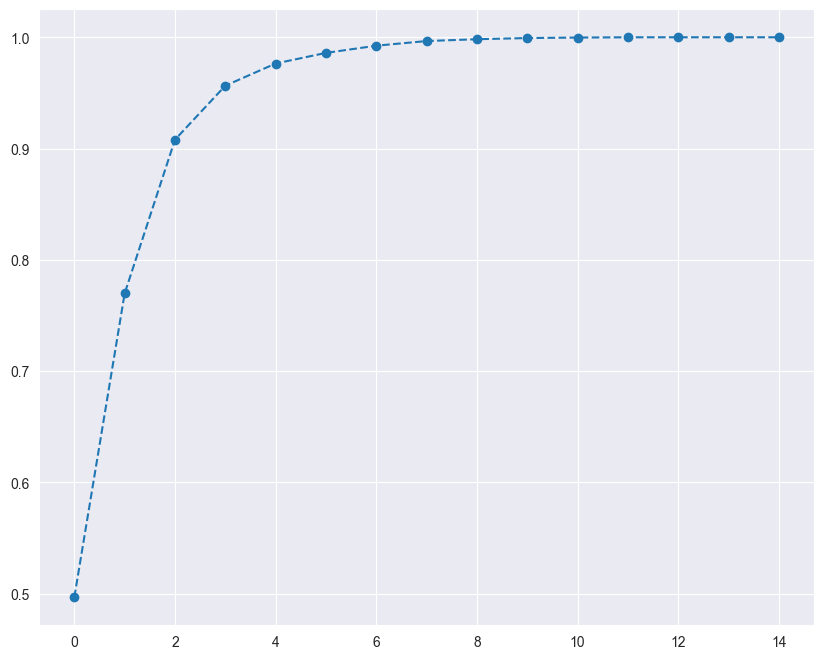

In [13]:
plt.figure(figsize=(10,8))
plt.plot(range(0,len(df_sample2.columns)), pca2.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

In [14]:
pca = PCA(n_components=3)
pca.fit(x2)
pca.transform(x2)
scores_pca = pca.transform(x2)

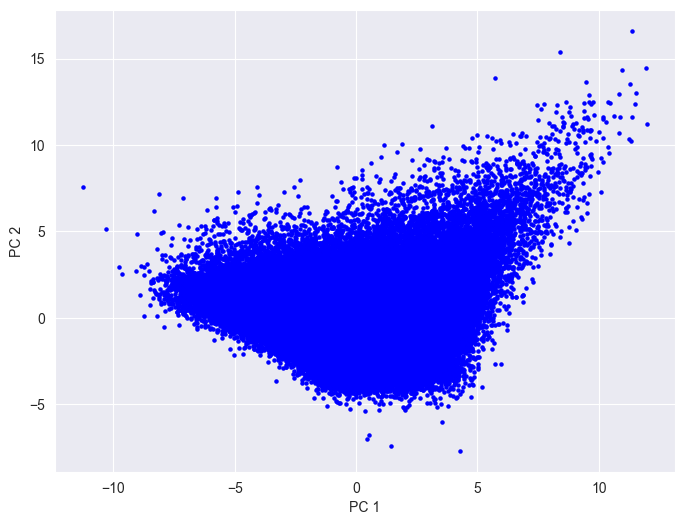

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], color='b', label='Principal Components', s=5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\pca_plot.png', dpi=300)  # Save the plot as a PDF file
plt.show()

C:\Users\Donald\anaconda3\envs\monkey_nuc_segment_v6\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


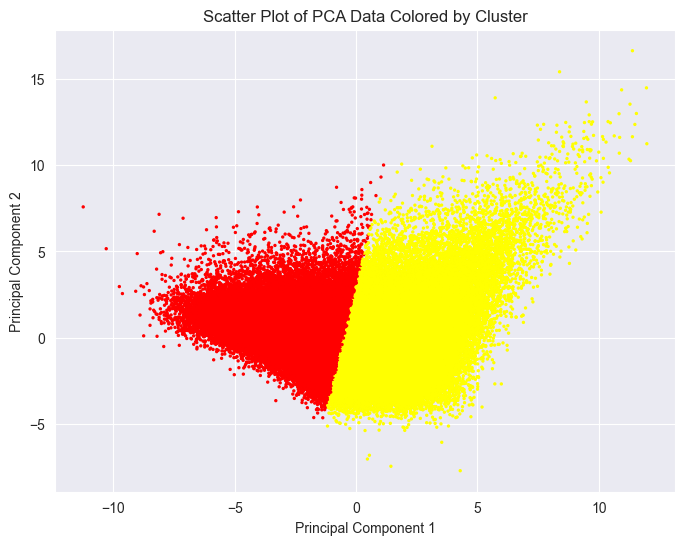

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)  # Choose the number of clusters
labels = kmeans.fit_predict(scores_pca)

plt.figure(figsize=(8, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], c=labels, cmap='autumn',s=2)
# plt.legend()
plt.title('Scatter Plot of PCA Data Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig(fr'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pdfs\pca_plot_liver.png', dpi=300)  # Save the plot as a PDF file
plt.show()

In [32]:
# normalize and get cols to isolate from liver_table
X_new = df_liver.loc[:,cols_to_select]

ds = 0.4416/0.5*4

X_new['Area'] = X_new['Area']/ds
X_new['Perimeter'] = X_new['Perimeter']/ds
X_new['maximum_radius'] = X_new['maximum_radius']/ds
X_new['mean_radius'] = X_new['mean_radius']/ds
X_new['minor_axis_length'] = X_new['minor_axis_length']/ds
X_new['major_axis_length'] = X_new['major_axis_length']/ds

X_new.iloc[:, :-3] = X_new.iloc[:, :-3].apply(z_score_normalize, axis=0)

In [37]:
X_new.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,minor_axis_length,major_axis_length,r_mean_intensity_norm,g_mean_intensity_norm,b_mean_intensity_norm
0,-0.077205,-0.102641,1.130959,-0.667902,-0.985434,-0.731135,0.885956,-0.985466,-0.278249,0.081059,0.251181,-0.232691,-1.130252,-2.442952,-2.470535
1,-0.846681,-0.935187,-0.302471,-0.838811,0.191732,-1.246720,0.390450,0.191699,-1.238537,-0.857597,-0.606847,-1.159390,-1.253668,-1.792261,-1.569824
2,0.072170,0.034656,1.324736,-0.998142,-1.125789,-1.951015,1.051167,-1.125822,-0.318923,0.242361,0.577686,-0.250553,0.353788,-0.690295,-0.580998
3,-0.926795,-1.006098,-0.782224,-0.708202,0.650238,-0.838588,-0.558764,0.650205,-1.217923,-0.976560,-0.752739,-1.204674,0.976964,-1.340248,-0.860567
4,-0.514910,-0.552941,0.491623,-0.685440,-0.492576,-0.777008,0.216384,-0.492610,-0.918573,-0.415566,-0.221355,-0.691543,-1.207197,-2.859513,-2.489028


In [38]:
from scipy.spatial.distance import cdist

centroids = kmeans.cluster_centers_

X_new_pca = pca.transform(X_new)

distances = cdist(X_new_pca, centroids)
new_labels = np.argmin(distances, axis=1)

In [39]:
len(new_labels)

58979644

In [62]:
output = pd.concat([df_liver.iloc[:,[2,3,-2]], pd.Series(new_labels)], axis=1)

In [63]:
output.head()

,Centroid_x,Centroid_y,slide_num,0
0,23022.0,9934.0,181.0,1
1,23424.0,9566.0,181.0,1
2,23258.0,9382.0,181.0,0
3,23174.0,10010.0,181.0,1
4,23358.0,9642.0,181.0,1


In [64]:
output[output['slide_num']==501]

,Centroid_x,Centroid_y,slide_num,0
19659814,25056.0,10174.0,501.0,1
19659815,24794.0,10436.0,501.0,1
19659816,25234.0,9968.0,501.0,1
19659817,24440.0,9604.0,501.0,1
19659818,24832.0,9966.0,501.0,1
...,...,...,...,...
19704100,26934.0,14498.0,501.0,1
19704101,26288.0,14874.0,501.0,1
19704102,26680.0,14944.0,501.0,1
19704103,26046.0,13948.0,501.0,1


In [65]:
import pickle

# Open a file for writing in binary mode
with open(r'C:\Users\Donald\PycharmProjects\monkey_nuc_segment\Segmentation_Analysis\monkey\stardist_volcell\plots\pickles\output.pkl', 'wb') as file:
    # Pickle the DataFrame and write it to the file
    pickle.dump(output, file)

C:\Users\Donald\AppData\Local\Temp\ipykernel_31708\789368313.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='viridis')


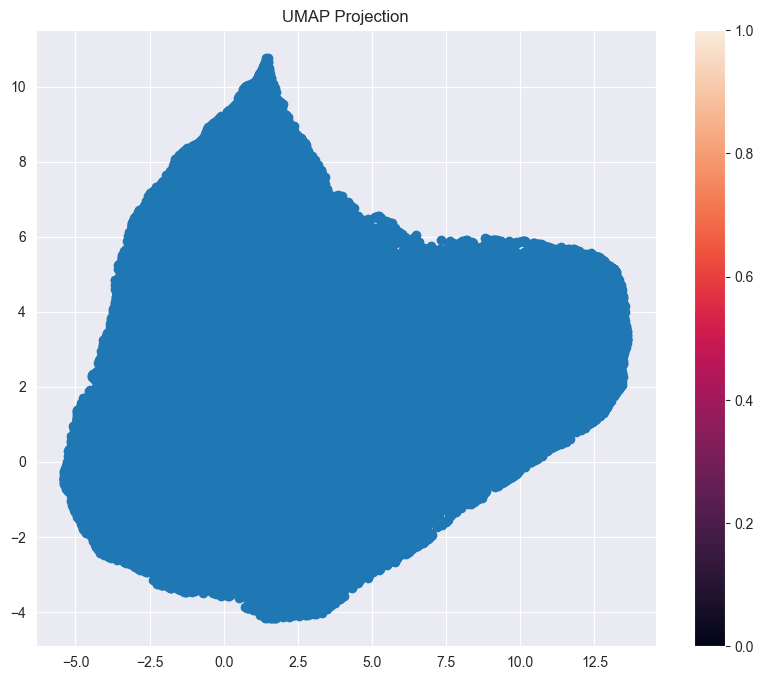

In [21]:
from umap import UMAP

umap_model = UMAP(n_components=2)  # Reduce to 2 dimensions
X_umap = umap_model.fit_transform(x2)

plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='viridis')
plt.colorbar()
plt.title('UMAP Projection')
plt.show()